In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
ds = pd.read_csv('/Users/SaiKalyan/Desktop/PERSONAL_LEARNING/AI&ML/DATASETS/insurance.csv')
ds


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [112]:
df = pd.read_csv('/Users/SaiKalyan/Desktop/MLPROJECTFINAL/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
ds.head()
ds.tail()
ds.describe()
ds.info()
ds.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
ds.isnull().sum().sort_values(ascending= False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
#Correlation
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

In [22]:
#First Linear Model

In [24]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [27]:
smoker_codes = {'no': 0, 'yes': 1}
ds['smoker_code'] = ds.smoker.map(smoker_codes)
sex_codes = {'female': 0, 'male': 1}
ds['sex_codes'] = ds.sex.map(sex_codes)

In [29]:
numeric_cols = ds.select_dtypes(include=[ float,int,bool]).columns
ds[numeric_cols].corr()

,age,bmi,children,charges,smoker_code,sex_codes
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
smoker_code,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
sex_codes,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


In [116]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


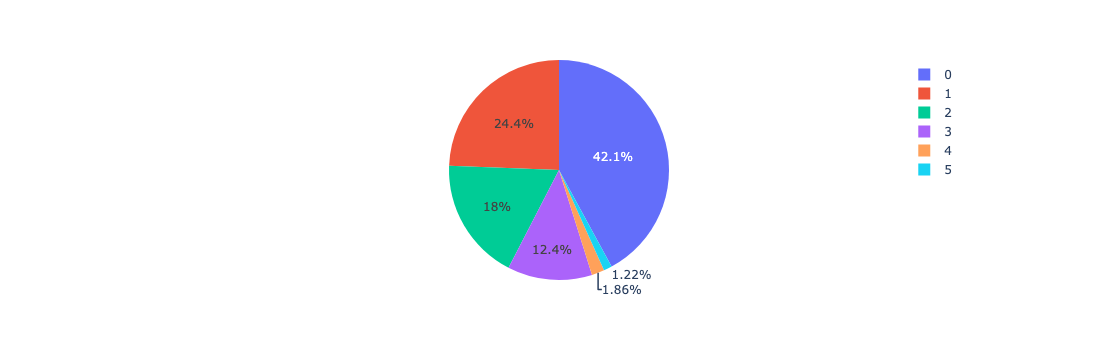

In [118]:
fig = px.pie(df, values='age', names='children')
fig.show()

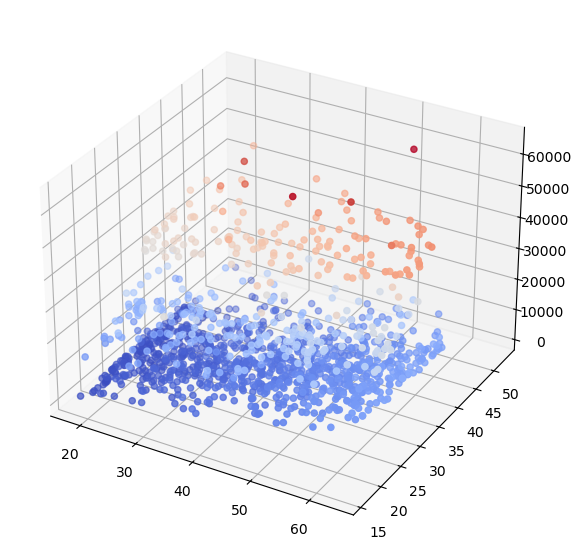

In [134]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["age"], df["bmi"], df["charges"], c=df["charges"], cmap="coolwarm")

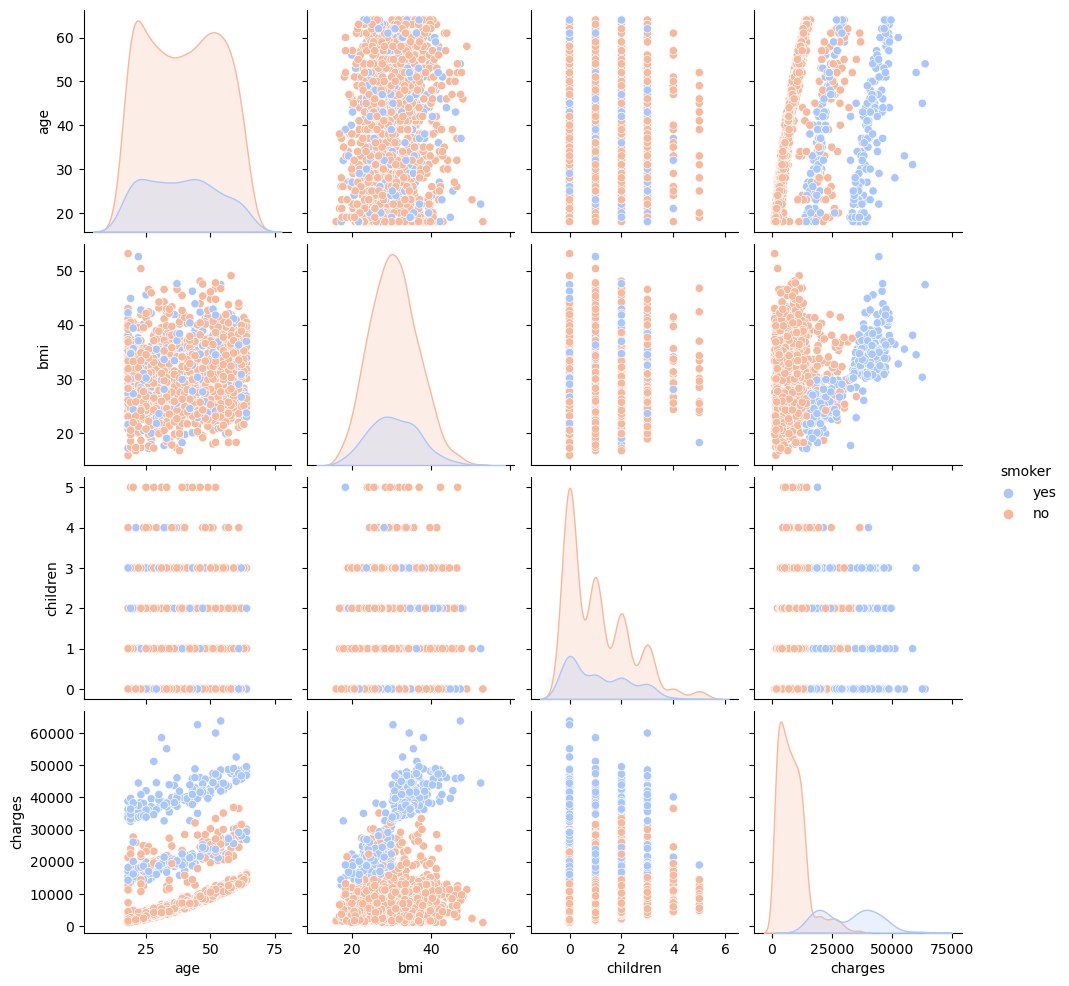

In [120]:
sns.pairplot(df, hue="smoker", palette="coolwarm")
plt.show()


In [31]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()
enc.fit(ds[['region']])
enc.categories_
one_hot = enc.transform(ds[['region']]).toarray()
one_hot
ds[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [34]:
input_cols = ["age","bmi","children","smoker_code","sex_codes","northeast","northwest","southeast","southwest",]

x = ds[input_cols]
y = ds['charges']

model = LinearRegression()
model.fit(x,y)
pred = model.predict(x)
pred

df  = pd.DataFrame({
    "age":ds.age,
"charges":ds.charges,
"predicted":pred
})
print(df)
rmse(y,pred)

      age      charges     predicted
0      19  16884.92400  25293.713028
1      18   1725.55230   3448.602834
2      28   4449.46200   6706.988491
3      33  21984.47061   3754.830163
4      32   3866.85520   5592.493386
...   ...          ...           ...
1333   50  10600.54830  12351.323686
1334   18   2205.98080   3511.930809
1335   18   1629.83350   4149.132486
1336   21   2007.94500   1246.584939
1337   61  29141.36030  37085.623268

[1338 rows x 3 columns]


6041.6796511744515

In [36]:

model.predict([[20,34,0,1,1,0,0,1,0.]])


array([27413.36403048])

In [38]:
numeric_cols = ["age","bmi","children"]
scaler2 = StandardScaler()
scaler2.fit(ds[numeric_cols])

StandardScaler()

In [41]:
scaled = scaler2.transform(ds[numeric_cols])
scaled

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [43]:
cat_cols = ["smoker_code","sex_codes","northeast","northwest","southeast","southwest"]
categorical_data = ds[cat_cols].values

In [45]:
x = np.concatenate((scaled,categorical_data ),axis=1)
y = ds.charges

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
y_pred

rmse(y,y_pred)

6041.6796511744515

In [48]:
model.predict([[-0.79795355, -0.10882659, 0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

In [51]:
#Model Improvements

In [54]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [58]:
#Gradient Boosting

In [60]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])


,Metrics
MAE_gradient,3.176947e+03
MSE_gradient,2.701738e+07
RMSE_gradient,5.197825e+03


In [62]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, Gradient_model.predict(X_test_scaled))

[0.91369891 0.89741182 0.88229902 0.90353382 0.8758929 ]


0.807674223797797

In [64]:
#Decision Tree Model

In [65]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.000769e+03
MSE_tree_reg,3.811588e+07
RMSE_tree_reg,6.173806e+03


In [66]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.7286685463515191

In [69]:
#Random Forest Model

In [74]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,3.100999e+03
MSE_forest_reg,2.840568e+07
RMSE_forest_reg,5.329698e+03


In [75]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

[0.90780046 0.88288729 0.87213754 0.88177831 0.86239099]


0.7977914828280066

In [77]:
#XGBoost Model

In [79]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train);

In [80]:
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,3.336294e+03
MSE_XGB,3.470670e+07
RMSE_XGB,5.891240e+03


In [81]:
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, XGB_model.predict(X_test_scaled))

[0.85516106 0.84967485 0.85304419 0.85393622 0.83041221]


0.7529370583468558

In [87]:
def predict_single_input(XGB_model, scaler, input_data):
    input_data = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = XGB_model.predict(input_scaled)
    return prediction[0] 

In [88]:
def predict_single_input_2(input_data):
    scaler3= StandardScaler()
    scaler3.fit(X_train)
    XGB_model =XGBRegressor()
    XGB_model.fit(X_train_scaled, y_train);
    input_data = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = XGB_model.predict(input_scaled)
    return prediction[0]

In [90]:
input_data = [19,1,27.900,0,1,1]

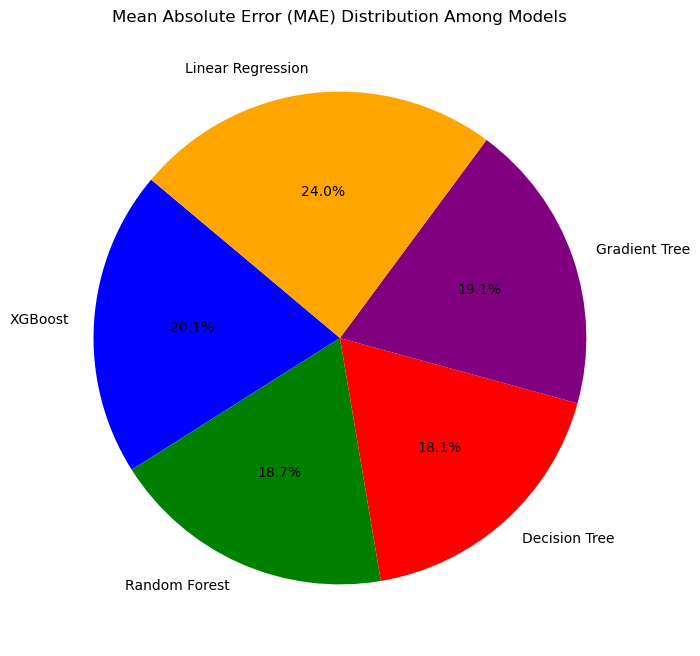

In [146]:



data = {
    "model" :["XGBoost","Random Forest","Decision Tree","Gradient Tree","Linear Regression"],
    "MAE": [3.336294e+03, 3.100999e+03, 3.000769e+03, 3.176947e+03, 3.990250e+03],
    "MSE": [3.470670e+07, 2.840568e+07, 3.811588e+07, 2.701738e+07, 3.353013e+07],
    "RMSE": [5.891240e+03, 5.329698e+03, 6.173806e+03, 5.197825e+03, 3.353013e+07]
}
data
plt.figure(figsize=(8, 8))
plt.pie(data["MAE"], labels=data["model"], autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Mean Absolute Error (MAE) Distribution Among Models")
plt.show()

In [97]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/Users/SaiKalyan/Desktop/MLPROJECTFINAL/insurance.csv')
df


ds.head()
ds.tail()
ds.describe()
ds.info()
ds.columns
ds.isnull().sum().sort_values(ascending= False)


#Correlation
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1


corr = df.corr()
corr['charges'].sort_values(ascending=False)
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


smoker_codes = {'no': 0, 'yes': 1}
ds['smoker_code'] = ds.smoker.map(smoker_codes)
sex_codes = {'female': 0, 'male': 1}
ds['sex_codes'] = ds.sex.map(sex_codes)
numeric_cols = ds.select_dtypes(include=[ float,int,bool]).columns
ds[numeric_cols].corr()


from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()
enc.fit(ds[['region']])
enc.categories_
one_hot = enc.transform(ds[['region']]).toarray()


ds[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
input_cols = ["age","bmi","children","smoker_code","sex_codes","northeast","northwest","southeast","southwest",]

x = ds[input_cols]
y = ds['charges']

model = LinearRegression()
model.fit(x,y)
pred = model.predict(x)
pred

df  = pd.DataFrame({
    "age":ds.age,
"charges":ds.charges,
"predicted":pred
})
print(df)
rmse(y,pred)


numeric_cols = ["age","bmi","children"]
scaler2 = StandardScaler()
scaler2.fit(ds[numeric_cols])
scaled = scaler2.transform(ds[numeric_cols])


cat_cols = ["smoker_code","sex_codes","northeast","northwest","southeast","southwest"]
categorical_data = ds[cat_cols].values
x = np.concatenate((scaled,categorical_data ),axis=1)
y = ds.charges


model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
y_pred
rmse(y,y_pred)


X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)


scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

#Gradient Boosting
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, Gradient_model.predict(X_test_scaled))

#Descision Tree
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])
r2_score(y_test, tree_reg_model.predict(X_test_scaled))


#RandomForest
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, forest_reg_model.predict(X_test_scaled))


#XGBoost
XGB_model =XGBRegressor()
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])
scores = cross_val_score(XGB_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, XGB_model.predict(X_test_scaled))'''

'\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import OrdinalEncoder\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom xgboost import XGBRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn import metrics\nfrom sklearn.metrics import r2_score\nfrom sklearn.model_selection import cross_val_score\n%matplotlib inline\nimport warnings\nwarnings.filterwarnings("ignore")\ndf = pd.read_csv(\'/Users/SaiKalyan/Desktop/MLPROJECTFINAL/insurance.csv\')\ndf\n\n\nds.head()\nds.tail()\nds.describe()\nds.info()\nds.columns\nds.isnull().sum().sort_values(ascending= False)\n\n\n#Correlation\ndf[\'sex\'] = pd.factorize(df[\'sex\'])[0] + 1\ndf

In [ ]:
fig = px.pie(df, values='age', names='children')
fig.show()